# **Importing Data**

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transaction_data.csv',engine='python', error_bad_lines=False) 

# **Basic Stastical Overview of Transaction data**

In [ ]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [ ]:
data.describe(include='all')

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
count,1.083818e+06,1.083818e+06,1083818,1.083818e+06,1080910,1.083818e+06,1.083818e+06,1083818
unique,NaN,NaN,23260,NaN,4223,NaN,NaN,38
top,NaN,NaN,Sat Jan 12 10:41:00 IST 2019,NaN,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,United Kingdom
freq,NaN,NaN,2228,NaN,4738,NaN,NaN,990956
mean,2.410162e+05,6.159417e+06,NaN,6.582687e+05,NaN,2.865675e+01,9.498798e+00,NaN
std,1.423364e+05,1.476341e+05,NaN,4.526314e+05,NaN,6.542432e+02,2.308139e+03,NaN
min,-1.000000e+00,5.900015e+06,NaN,-1.000000e+00,NaN,-2.429850e+05,-1.526564e+04,NaN
25%,2.593920e+05,6.026856e+06,NaN,4.609080e+05,NaN,3.000000e+00,1.730000e+00,NaN
50%,3.020220e+05,6.166611e+06,NaN,4.752930e+05,NaN,9.000000e+00,2.880000e+00,NaN
75%,3.413550e+05,6.289569e+06,NaN,4.889430e+05,NaN,3.000000e+01,5.700000e+00,NaN


# **Data Cleaning**

**Keeping Only One Duplicate Values**

In [2]:
print(data.shape)
data.drop_duplicates(subset=data.columns,keep='first',inplace=True)
print(data.shape)

(1083818, 8)
(536572, 8)


In [3]:
data.index = range(0,len(data))

**Dealing with Missing Values**

In [4]:
data.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           1454
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [5]:
ID_nullvalues = data[data['UserId']==-1]['ItemDescription']
print(len(ID_nullvalues))
print(ID_nullvalues.isnull().sum())

135003
1454


In [6]:
subID_df = data[data['ItemDescription'].isnull()==True]
index_missing_value = data[data['ItemDescription'].isnull()==True].index

In [7]:
index_missing_value

Int64Index([   322,    762,   1080,   2202,   2208,   3392,   4125,   4240,
              4659,   4666,
            ...
            534761, 535080, 535240, 535347, 535589, 535657, 535926, 535982,
            536292, 536403],
           dtype='int64', length=1454)

In [8]:
for i in subID_df.columns:
  print(i)
  print(subID_df[i].unique())

UserId
[-1]
TransactionId
[6314803 6206420 6297863 ... 6040947 6272178 5973539]
TransactionTime
['Mon Jan 14 11:15:00 IST 2019' 'Mon Nov 05 05:34:00 IST 2018'
 'Sat Jan 05 12:06:00 IST 2019' ... 'Mon Jun 18 13:32:00 IST 2018'
 'Wed Dec 19 11:50:00 IST 2018' 'Tue Apr 17 06:09:00 IST 2018']
ItemCode
[ 495159  434364 1782417  458157 1666056 1778868  476469 1787079  472899
  435351  437934 1528842  448539 1787856  474159  747663 1786428  459858
  441840 1781640 1788675 1781283  474348  441798  747558  999054  210042
 1769271  840336 1783467 1776873  477162 1775802 1785378  752283 1721013
  482748 1665909  754971  456918 1775949  482139  466242  439110  462735
 1783026  463764  480753  378147  438816 1785126  479430  747411  437283
  476427  462714  466074  457401  439761 1788969  452235  446124 1788759
  477540  471849  966777  465066  459228  755265 1787835  449610  479934
 1783824  488943  481425  459816 1787646  748545  451731  752115  440475
 1732143  453978  467712 1777209 1528800  48

In [9]:
print(len(subID_df['ItemCode'].unique()))
print(data['ItemDescription'].isnull().sum())


886
1454


In [10]:
print(list(data[data['ItemCode'] == 495159]['ItemDescription'].mode())[0])
data[(data['ItemCode'] == 495159)&(data['CostPerItem'] == 5.7)] #5.7,2.7,2.28

SNACK TRAY I LOVE LONDON


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
27775,-1,6388019,Sat Feb 16 13:24:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom
102394,-1,6396412,Wed Feb 20 06:03:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom
135040,-1,6393387,Tue Feb 19 05:20:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom
149492,-1,6390813,Sun Feb 17 12:26:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,9,5.7,United Kingdom
230519,-1,6374632,Sun Feb 10 12:47:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom
240094,-1,6381265,Tue Feb 12 12:22:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom
317274,-1,6395829,Tue Feb 19 12:30:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,6,5.7,United Kingdom
321863,-1,6388030,Sat Feb 16 13:28:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,9,5.7,United Kingdom
376734,-1,6384037,Wed Feb 13 12:39:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,6,5.7,United Kingdom
406346,-1,6393409,Tue Feb 19 05:28:00 IST 2019,495159,SNACK TRAY I LOVE LONDON,3,5.7,United Kingdom


In [11]:
index_missingby_ItemCode = []
for i in subID_df['ItemCode'].unique():
  ID_particularItemcode_df = pd.DataFrame(data[data['ItemCode'] == i]['ItemDescription']).isnull()
  index_data = list(ID_particularItemcode_df[ID_particularItemcode_df['ItemDescription']==True].index)
  index_missingby_ItemCode.extend(index_data)   

In [12]:
sorted(index_missingby_ItemCode) == sorted(index_missing_value)

True

In [13]:
 for i in subID_df['ItemCode'].unique():
  Missing_ID = list(data[data['ItemCode'] == i]['ItemDescription'].mode())
  if len(Missing_ID) == 0:
    continue
  Missing_ID = Missing_ID[0]
  Replace_CPI = list(data[data['ItemCode']==i]['CostPerItem'].mode())[0]
  ID_particularItemcode_df = pd.DataFrame(data[data['ItemCode'] == i]['ItemDescription']).isnull()
  index_data = list(ID_particularItemcode_df[ID_particularItemcode_df['ItemDescription']==True].index)
  for j in index_data:
    data.iloc[j,4] = Missing_ID
    data.iloc[j,6] = Replace_CPI





In [14]:
data.isnull().sum()

UserId                     0
TransactionId              0
TransactionTime            0
ItemCode                   0
ItemDescription           91
NumberOfItemsPurchased     0
CostPerItem                0
Country                    0
dtype: int64

In [15]:
data[data['ItemDescription'].isnull()==True]['TransactionId'].unique()

array([6040936, 6027945, 5906945, 6065774, 6041937, 6040727, 5968391,
       6066071, 6041904, 6067479, 6040969, 6035447, 5967852, 5946160,
       5967841, 5968149, 6030959, 6097520, 6176478, 6040958, 6037768,
       6035502, 6032015, 5920651, 6065906, 5968215, 6176324, 5901995,
       5907011, 6067259, 5968017, 5902039, 6001226, 6065785, 6176346,
       5968138, 6177127, 6040870, 5968402, 5968083, 6168030, 5966565,
       6065752, 5966587, 6039099, 5966301, 6037757, 6065862, 6029078,
       6001182, 6176280, 6035458, 6039341, 5947513, 5968171, 6065994,
       5976388, 5966554, 6042652, 5997409, 5966598, 6173750, 5968204,
       5916625, 6035469, 6065961, 6039044, 5902094, 6039011, 6176423,
       5902072, 6239277, 6067292, 6029045, 6042641, 5968303, 5968226,
       5968116, 6177105, 5919507, 6176302, 5919518, 5968061, 5967819,
       6042905, 5902050, 6042784, 6173805, 6067413, 5968380, 6043125])

In [16]:
data[data['TransactionId'] == 5968303]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
444285,-1,5968303,Wed Apr 11 10:55:00 IST 2018,1787310,NaN,-3,0.0,United Kingdom


In [17]:
data.dropna(inplace=True)

In [18]:
data.index = range(0,len(data))

In [19]:
data.isnull().any()

UserId                    False
TransactionId             False
TransactionTime           False
ItemCode                  False
ItemDescription           False
NumberOfItemsPurchased    False
CostPerItem               False
Country                   False
dtype: bool

**Converting TransactionDate to string fromat **


In [20]:
moth_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [21]:
import datetime
def date_format(text):
  dated_string = text[8:10] + ' ' + text[4:7] + ' ' + text[24:] + ' ' + text[11:19]
  dated = datetime.datetime.strptime(dated_string,'%d %b %Y %H:%M:%S')
  return dated
def day(text):
  return text[:3]
data['TransactionDate']= data['TransactionTime'].apply(lambda x:date_format(x))
data['TransactionDay'] = data['TransactionTime'].apply(lambda x:day(x))
data.drop('TransactionTime',axis=1,inplace=True)

In [22]:
data.head()

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TransactionDate,TransactionDay
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00,Sat
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00,Wed
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15 09:45:00,Fri
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00,Fri
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10 11:58:00,Mon


In [23]:
data['TransactionYear'] = data['TransactionDate'].apply(lambda x:x.year)
data['TransactionMonth'] = data['TransactionDate'].apply(lambda x:x.month)
data['TransactionTime'] = data['TransactionDate'].apply(lambda x:int(str(x)[11:13]))
data['TrasactionDatee'] = data['TransactionDate'].apply(lambda x:x.day)

In [24]:
data.head()

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TransactionDate,TransactionDay,TransactionYear,TransactionMonth,TransactionTime,TrasactionDatee
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00,Sat,2019,2,12,2
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00,Wed,2018,12,9,26
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15 09:45:00,Fri,2019,2,9,15
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00,Fri,2018,6,7,22
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10 11:58:00,Mon,2018,9,11,10


In [25]:
data['TransactionYear'] = data['TransactionYear'].apply(lambda x:2018 if x == 2028 else x)

In [26]:
data[data['CostPerItem']<0]

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TransactionDate,TransactionDay,TransactionYear,TransactionMonth,TransactionTime,TrasactionDatee
35122,-1,6195046,-1,Adjust bad debt,3,-15265.64,United Kingdom,2018-10-24 10:51:00,Wed,2018,10,10,24
491420,-1,6195057,-1,Adjust bad debt,3,-15265.64,United Kingdom,2018-10-24 10:52:00,Wed,2018,10,10,24


In [27]:
data[(data['ItemCode']==-1) & (data['ItemDescription'] == 'Adjust bad debt')]

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TransactionDate,TransactionDay,TransactionYear,TransactionMonth,TransactionTime,TrasactionDatee
35122,-1,6195046,-1,Adjust bad debt,3,-15265.64,United Kingdom,2018-10-24 10:51:00,Wed,2018,10,10,24
423271,-1,6195035,-1,Adjust bad debt,3,15265.65,United Kingdom,2018-10-24 10:50:00,Wed,2018,10,10,24
491420,-1,6195057,-1,Adjust bad debt,3,-15265.64,United Kingdom,2018-10-24 10:52:00,Wed,2018,10,10,24


In [28]:
data.iloc[35122,5] = 15265.65 
data.iloc[491420,5] = 15265.65

In [29]:
data['TransactionYear'].unique()

array([2019, 2018])

In [30]:
data[data['NumberOfItemsPurchased']<0]

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TransactionDate,TransactionDay,TransactionYear,TransactionMonth,TransactionTime,TrasactionDatee
69,300909,6015757,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom,2018-05-29 14:14:00,Tue,2018,5,14,29
135,319683,6036228,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom,2018-06-16 08:28:00,Sat,2018,6,8,16
148,-1,6108674,1780905,wet damaged,-288,0.00,United Kingdom,2018-08-14 07:12:00,Tue,2018,8,7,14
329,321531,5925150,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom,2018-02-24 11:05:00,Sat,2018,2,11,24
330,260715,6165940,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia,2018-09-30 08:26:00,Sun,2018,9,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536295,-1,6018001,478800,ANTIQUE TALL SWIRLGLASS TRINKET POT,-12,5.18,United Kingdom,2018-06-01 12:14:00,Fri,2018,6,12,1
536378,294714,6149209,487452,HEART WREATH DECORATION WITH BELL,-108,1.73,United Kingdom,2018-09-16 09:10:00,Sun,2018,9,9,16
536387,369096,6381441,1785714,3 ROSE MORRIS BOXED CANDLES,-36,5.87,United Kingdom,2019-02-12 14:12:00,Tue,2019,2,14,12
536458,333648,6242852,443856,PAINTED METAL PEARS ASSORTED,-24,2.34,United Kingdom,2018-12-03 05:44:00,Mon,2018,12,5,3


In [31]:
data['NumberOfItemsPurchased'] = data['NumberOfItemsPurchased'].apply(lambda x:-x if x<0 else x)

## **EDA**

In [ ]:
import seaborn as sns

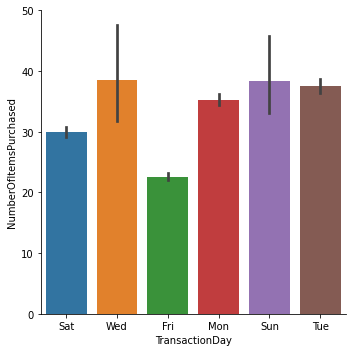

In [ ]:
sns.catplot(x='TransactionDay',y='NumberOfItemsPurchased',data=data,kind='bar')

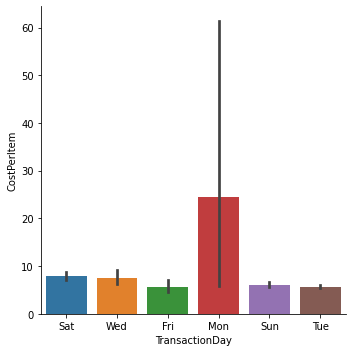

In [ ]:
sns.catplot(x='TransactionDay',y='CostPerItem',data=data,kind='bar')

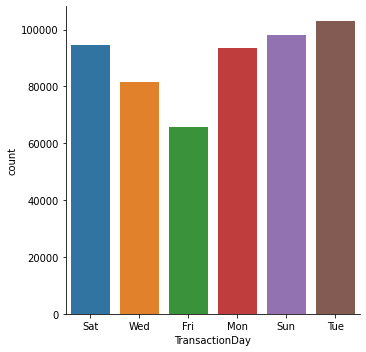

In [ ]:
sns.catplot(x = 'TransactionDay',data=data,kind='count')

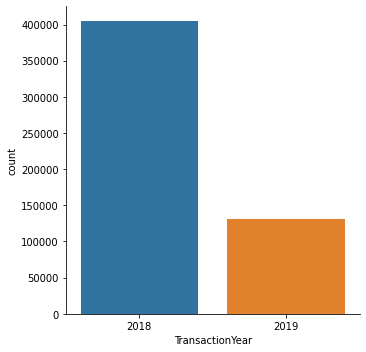

In [ ]:
sns.catplot(x='TransactionYear',data=data,kind='count')

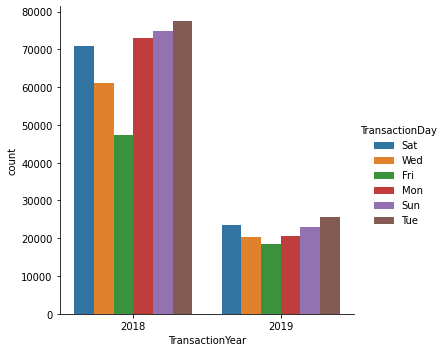

In [ ]:
sns.catplot(x='TransactionYear',data=data,kind='count',hue='TransactionDay')

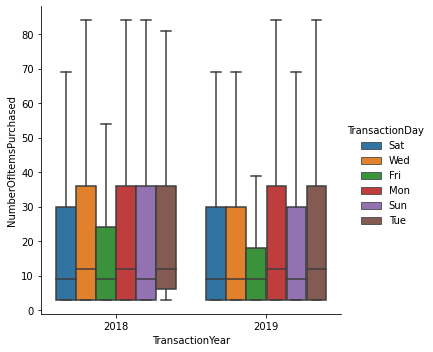

In [ ]:
sns.catplot(x='TransactionYear',y='NumberOfItemsPurchased',data=data,kind='box',hue='TransactionDay',showfliers = False)

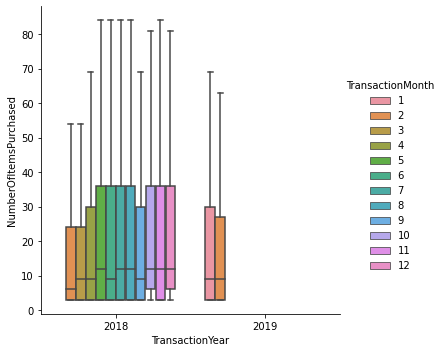

In [ ]:
sns.catplot(x='TransactionYear',y='NumberOfItemsPurchased',data=data,kind='box',hue='TransactionMonth',showfliers = False)

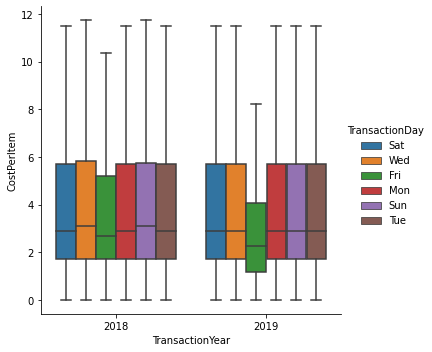

In [ ]:
sns.catplot(x='TransactionYear',y='CostPerItem',data=data,kind='box',hue='TransactionDay',showfliers = False)

# **Insights about different customers**

**Segmenting with UserId**

In [33]:
group_tranId = data.groupby('UserId')

In [ ]:
df_grp_UId = group_tranId.describe()


**Active Users**

In [ ]:
df_grp_UId[df_grp_UId['TransactionId']['count']==df_grp_UId['TransactionId']['count'].max()]


TransactionId                               ... TrasactionDatee            
               count          mean            std  ...             50%   75%   max
UserId                                             ...                            
-1          269978.0  6.138464e+06  155767.694144  ...            17.0  23.0  31.0

[1 rows x 64 columns]

In [ ]:
print(df_grp_UId['TransactionId']['count'])
activeU_list = list(df_grp_UId['TransactionId']['count'].nlargest(1000).index)
sorted(activeU_list)


UserId
-1         269978.0
 259266         4.0
 259287       364.0
 259308        62.0
 259329       146.0
             ...   
 383880        20.0
 383901        14.0
 383922        26.0
 383943      1512.0
 384027       140.0
Name: count, Length: 4373, dtype: float64


[-1,
 259287,
 259497,
 259539,
 259560,
 259602,
 259770,
 259938,
 260295,
 260337,
 260568,
 260589,
 260715,
 260757,
 260883,
 260988,
 261051,
 261093,
 261177,
 261324,
 261429,
 261471,
 261576,
 261891,
 261912,
 261933,
 261954,
 261996,
 262017,
 262080,
 262101,
 262164,
 262290,
 262521,
 262542,
 262857,
 262878,
 262920,
 262983,
 263004,
 263256,
 263319,
 263340,
 263613,
 263676,
 263760,
 263802,
 263907,
 263949,
 264117,
 264138,
 264243,
 264264,
 264474,
 264537,
 264558,
 264747,
 264810,
 264873,
 265041,
 265146,
 265167,
 265377,
 265587,
 265776,
 265902,
 266028,
 266238,
 266301,
 266322,
 266343,
 266385,
 266448,
 266700,
 266805,
 266868,
 266889,
 266952,
 266994,
 267120,
 267141,
 267246,
 267267,
 267351,
 267603,
 267624,
 267708,
 267729,
 267813,
 267897,
 268086,
 268359,
 269556,
 269598,
 269619,
 269640,
 269661,
 269934,
 269976,
 270207,
 270417,
 270921,
 271341,
 271635,
 271677,
 271908,
 271929,
 272055,
 272097,
 272370,
 272391,
 2730

**Which Day they mostly shop ?**

In [ ]:
mnth = []
for i in activeU_list:
  ind = list(data[data['UserId']==i].index)
  for j in ind:
    mnth.append(data.iloc[j,8])

In [ ]:
from collections import Counter
Counter(mnth).most_common(1)[0][0]

'Sun'

**User who shop all 12 months ?**

In [ ]:
set_allM = set(data[data['UserId'] == -1]['TransactionMonth'])

In [ ]:
Usr_allM = []
for i in activeU_list:
  set_n = set(data[data['UserId']==i]['TransactionMonth'])
  if set_allM == set_n:
    Usr_allM.append(i)
print(Usr_allM)

[-1, 374661, 313131, 267708, 306726, 321531, 307566, 274869, 300258, 315819, 297276, 315105, 336693, 367731, 305067, 374031, 372897, 371175, 287574, 266322, 325458, 339381, 281568, 279699, 363615, 261954, 316638, 269661, 289758, 289107, 344862, 282618, 274638, 366450, 365988, 319074, 353094, 308280, 272391, 282828, 382683, 353619, 358428, 336609, 377181, 297780, 365169, 295071, 295260, 347025, 382158, 336273, 285096, 290934]


In [ ]:
len(Usr_allM)

54

**Which Date they shop ?**

In [ ]:
list_date=[]
for i in activeU_list:
  act_date = list(data[data['UserId']==i]['TrasactionDatee'])
  fre_date = Counter(act_date).most_common(1)[0][0]
  list_date.append(fre_date)
fre_date = pd.DataFrame(list_date)
print(fre_date[0].value_counts())  

18    50
16    49
30    45
17    45
19    41
8     40
25    39
23    37
12    35
20    35
21    34
28    34
29    34
11    34
22    33
9     31
3     31
1     31
15    31
4     30
13    29
5     29
6     26
14    25
10    25
2     25
24    24
27    24
26    23
7     18
31    13
Name: 0, dtype: int64


**Who all shops at starting of the month ?**

In [ ]:
startmnth=[]
for i in activeU_list:
  usr = data[(data['UserId']==i)&(data['TrasactionDatee'] < 5)]['UserId'].max()
  startmnth.append(usr)
print(startmnth)

[-1, 374661, 313131, 296016, 267708, 306726, 321531, 307566, 274869, 278523, 300258, 315819, 297276, 380478, 297339, 310716, 315105, 336693, 295176, 310149, 367731, 274701, 305067, 347529, 303576, 330099, 326655, 355551, 374031, 304605, 260715, 364098, 383943, 372897, 271341, 371175, 318339, nan, 354984, nan, 326487, 355383, 376320, 372435, 326109, 343560, 351309, nan, 332976, 266301, 293349, 350973, 304542, 277830, 302715, 275058, 298074, 295848, 350406, 287574, 369831, 308007, 361998, 369642, 315483, 322518, 335853, 305214, 270207, nan, nan, 355110, 361851, nan, 261891, 266322, 325458, nan, 358239, 315693, 335958, 312795, 295029, 364266, 339381, 281568, 287028, 309330, 279699, 328440, 377034, 359919, 363615, 263340, 315441, 265041, 347718, 378861, nan, nan, nan, 364665, 263907, 333207, 315924, 273378, 261954, 380289, 351666, 369201, 295785, 316638, 353073, 278628, 350952, 305802, nan, 269661, 289758, 275037, nan, 380142, 327915, 283248, 364140, 274050, 308364, nan, nan, 364917, 35666

**What Product they often brought ?**

In [ ]:
mnth = []
for i in activeU_list:
  ind = list(data[data['UserId']==i].index)
  for j in ind:
    mnth.append(data.iloc[j,3])

In [ ]:
df_Item = pd.DataFrame(mnth)
df_Item.columns = ['Item']

In [ ]:
df_actP = pd.DataFrame(df_Item['Item'].value_counts())
df_actP.head(20)


,Item
JUMBO BAG RED RETROSPOT,3440
WHITE HANGING HEART T-LIGHT HOLDER,3360
REGENCY CAKESTAND 3 TIER,2942
LUNCH BAG RED RETROSPOT,2708
PARTY BUNTING,2440
LUNCH BAG BLACK SKULL.,2200
SET OF 3 CAKE TINS PANTRY DESIGN,2160
JUMBO BAG PINK POLKADOT,2102
PACK OF 72 RETROSPOT CAKE CASES,2100
JUMBO STORAGE BAG SUKI,2100


**Family purchasing users ?**

In [ ]:
Items = data['ItemCode'].unique()
item_list=[]
df_item = pd.DataFrame()
for i in activeU_list:
  trans = list(data[data['UserId']==i]['TransactionId'].unique())
  for j in trans:
    Items_usr = list(data[data['TransactionId']==j]['ItemCode'].unique())
    item_list.append(Items_usr)
  item_size = [len(k) for k in item_list]
  index = item_size.index(max(item_size))
  df_item2 = pd.DataFrame([i,len(set(item_list[index]))])
  df_item = df_item.append(df_item2.T,ignore_index=True)
print(df_item)
  

          0     1
0        -1  1075
1    374661  1075
2    313131  1075
3    296016  1075
4    267708  1075
..      ...   ...
995  279720  1075
996  300405  1075
997  311577  1075
998  318612  1075
999  319494  1075

[1000 rows x 2 columns]


In [ ]:
list(df_item[0])


[-1,
 374661,
 313131,
 296016,
 267708,
 306726,
 321531,
 307566,
 274869,
 278523,
 300258,
 315819,
 297276,
 380478,
 297339,
 310716,
 315105,
 336693,
 295176,
 310149,
 367731,
 274701,
 305067,
 347529,
 303576,
 330099,
 326655,
 355551,
 374031,
 304605,
 260715,
 364098,
 383943,
 372897,
 271341,
 371175,
 318339,
 352044,
 354984,
 275877,
 326487,
 355383,
 376320,
 372435,
 326109,
 343560,
 351309,
 341061,
 332976,
 266301,
 293349,
 350973,
 304542,
 277830,
 302715,
 275058,
 298074,
 295848,
 350406,
 287574,
 369831,
 308007,
 361998,
 369642,
 315483,
 322518,
 335853,
 305214,
 270207,
 364077,
 333081,
 355110,
 361851,
 301707,
 261891,
 266322,
 325458,
 322476,
 358239,
 315693,
 335958,
 312795,
 295029,
 364266,
 339381,
 281568,
 287028,
 309330,
 279699,
 328440,
 377034,
 359919,
 363615,
 263340,
 315441,
 265041,
 347718,
 378861,
 361620,
 379449,
 274449,
 364665,
 263907,
 333207,
 315924,
 273378,
 261954,
 380289,
 351666,
 369201,
 295785,
 3166

In [ ]:
list_mostP = df_item[0].nlargest(100)
family_usr = set(list_mostP).union(set(Usr_allM))

In [ ]:
family_usr


{-1,
 261954,
 266322,
 267708,
 269661,
 272391,
 274638,
 274869,
 279699,
 281568,
 282618,
 282828,
 285096,
 287574,
 289107,
 289758,
 290934,
 295071,
 295260,
 297276,
 297780,
 300258,
 305067,
 306726,
 307566,
 308280,
 313131,
 315105,
 315819,
 316638,
 319074,
 321531,
 325458,
 336273,
 336609,
 336693,
 339381,
 344862,
 347025,
 353094,
 353619,
 358428,
 363615,
 365169,
 365988,
 366450,
 367731,
 370671,
 370692,
 370839,
 371007,
 371112,
 371133,
 371175,
 371217,
 371322,
 371385,
 371406,
 371490,
 371616,
 371700,
 371826,
 372036,
 372099,
 372162,
 372225,
 372288,
 372330,
 372435,
 372624,
 372750,
 372897,
 372918,
 373149,
 373254,
 373317,
 373527,
 373590,
 373737,
 373779,
 373842,
 374031,
 374052,
 374073,
 374367,
 374577,
 374598,
 374661,
 374850,
 375018,
 375081,
 375123,
 375165,
 375270,
 375543,
 375564,
 375774,
 375837,
 376320,
 376341,
 377034,
 377181,
 377265,
 377454,
 377475,
 377559,
 377937,
 378336,
 378462,
 378714,
 378861,
 3789

**20 One time Purchaser and often Purchaser ?**

In [ ]:
dict_trn={}
list_userid=[]
list_timestrn=[]
for i in activeU_list:
  trn_times = len(list(data[data['UserId']==i]['TransactionId'].unique()))
  list_userid.append(i)
  list_timestrn.append(trn_times)
df_trn = pd.DataFrame([list_userid,list_timestrn])
df_trn = df_trn.T
df_trn.sort_values(by=[1],inplace=True)
single_P = list(df_trn[0][:20])

In [ ]:
single_P

[315084,
 352800,
 378462,
 302022,
 266448,
 259497,
 324744,
 340662,
 315126,
 330120,
 259938,
 343140,
 285516,
 338541,
 334299,
 352548,
 267603,
 328965,
 284508,
 333312]

In [ ]:
df_trn.sort_values(by=[1],inplace=True,ascending=False)
often_P = list(df_trn[0][:20])

In [ ]:
often_P

[-1,
 313131,
 267708,
 374661,
 306726,
 321531,
 274869,
 272391,
 305067,
 281568,
 307566,
 336609,
 344862,
 297276,
 289758,
 380142,
 287574,
 366450,
 316281,
 336273]

**Night Shoppers and Morning Shoppers ?**

In [ ]:
night_sh = data[data['TransactionTime']>20]
mrn_sh = data[data['TransactionTime']<8]

In [ ]:
print(mrn_sh['UserId'][:10].unique())

[380478     -1 321321 364308 364266 344253 291753 355383]


**User migrated**

In [ ]:
for i in data['UserId'].unique():
  mig = len(list(data[data['UserId'] == i]['Country'].unique()))
  if mig > 1:
    print(i)



-1
259770
261009
261051
260757
261597
261555
260274
260862


In [ ]:
data[data['UserId']== 261009]['Country'].unique()

array(['Denmark', 'Austria'], dtype=object)

**ii. Inactive User**

In [ ]:
inactiveU_df = df_grp_UId[df_grp_UId['TransactionId']['count']==df_grp_UId['TransactionId']['count'].min()]
print(inactiveU_df)

       TransactionId                            ... TrasactionDatee                  
               count       mean std        min  ...             25%   50%   75%   max
UserId                                          ...                                  
262563           1.0  5942981.0 NaN  5942981.0  ...            20.0  20.0  20.0  20.0
262605           1.0  5981173.0 NaN  5981173.0  ...            25.0  25.0  25.0  25.0
271803           1.0  5981371.0 NaN  5981371.0  ...            25.0  25.0  25.0  25.0
273357           1.0  6383641.0 NaN  6383641.0  ...            13.0  13.0  13.0  13.0
275079           1.0  6217387.0 NaN  6217387.0  ...            13.0  13.0  13.0  13.0
...              ...        ...  ..        ...  ...             ...   ...   ...   ...
380373           1.0  5910960.0 NaN  5910960.0  ...            17.0  17.0  17.0  17.0
380961           1.0  5925887.0 NaN  5925887.0  ...            25.0  25.0  25.0  25.0
381654           1.0  6384081.0 NaN  6384081.0  ...   

In [ ]:
mnth = []
for i in inactiveU_df.index:
  ind = list(data[data['UserId']==i].index)
  for j in ind:
    mnth.append(data.iloc[j,6])

In [ ]:
from collections import Counter
Counter(mnth).most_common(1)[0][0]

'United Kingdom'

In [ ]:
mnth = []
for i in inactiveU_df.index:
  ind = list(data[data['UserId']==i].index)
  for j in ind:
    mnth.append(data.iloc[j,10])

In [ ]:
from collections import Counter
Counter(mnth).most_common(1)[0][0]

2

In [ ]:
df_Item = pd.DataFrame(mnth)
df_Item.columns = ['Item']

In [ ]:
inacP = pd.DataFrame(df_Item['Item'].value_counts())
inacP.head(20)

,Item
2,20
4,9
9,8
5,7
6,6
11,5
8,5
3,5
12,4
1,4


# **Apriori Algorithm**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transaction_data.csv',engine='python', error_bad_lines=False) 

In [ ]:
print(data.shape)
data.drop_duplicates(subset=data.columns,keep='first',inplace=True)
print(data.shape)
data.index = range(0,len(data))

(1083818, 8)
(536572, 8)


In [ ]:
data = data.iloc[48000:52000,:]

In [ ]:
dataset = []
for i in data['TransactionId'].unique():
  sub_dataset = list(data[data['TransactionId']==i]['ItemCode'].unique())
  if len(sub_dataset) > 2:
    dataset.append(sub_dataset)
dataset

[[458220, 450492, 474537, 489720],
 [1732374, 443772, 482559, 441042, 436170],
 [451059, 450219, 465654],
 [462525, 1788759, 477288, 468300],
 [1514688, 472647, 449547, 449757],
 [445137, 482475, 486360],
 [440643, 442680, 447888],
 [468846, 457548, 489468],
 [465654, 466704, 444234, 461307],
 [473991, 440433, 441315, 490203],
 [449967, 434952, 434931],
 [433734, 480396, 435246, 460803, 476763],
 [435078, 470904, 1734138],
 [442365, 468363, 487053, 487788, 473718, 472374],
 [492177, 494214, 493710],
 [460509, 447888, 1780716],
 [1764651, 467460, 463806],
 [1576029, 445851, 487284],
 [477246, 1783173, 470358, 1892709, -1],
 [465885, 471345, 435834, 466599, -1],
 [1783383, 340725, 457842],
 [477456, 489762, 473655, 465654, 1789872, 470883, 479094],
 [340956, 459291, 493374, 1785714, 474075, 1778532, 1784727],
 [487284, 444612, 474642],
 [432978, 1776516, 479178, 469455],
 [1781388, 457863, 488754, 485184, 461622, 444444],
 [748566, 468888, 463344, 487746, 485163, 490434],
 [464898, 46405

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


#dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
   #        ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
  #         ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 #          ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
#           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print('okay')
df = pd.DataFrame(te_ary, columns=te.columns_)
print('hi')
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
print('ok')

rules_ger = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

okay
hi
ok


In [ ]:
rules = rules.append(rules_ger)
print(rules)

      antecedents  ... conviction
0        (212793)  ...   1.988636
1        (451878)  ...        inf
2        (212793)  ...   1.988636
3        (464835)  ...        inf
4        (212793)  ...   1.988636
...           ...  ...        ...
37597    (490707)  ...        inf
37598    (486612)  ...        inf
37599   (1894326)  ...        inf
37600    (466263)  ...        inf
37601    (480186)  ...   1.988636

[5076634 rows x 9 columns]


In [ ]:
lst=[]
for i in rules['antecedents']:
  n = list(i)[0]
  lst.append(n)
rules['antecedents'] = lst
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,212793,(451878),0.011364,0.005682,0.005682,0.5,88.0,0.005617,1.988636
1,451878,(212793),0.005682,0.011364,0.005682,1.0,88.0,0.005617,inf
2,212793,(464835),0.011364,0.005682,0.005682,0.5,88.0,0.005617,1.988636
3,464835,(212793),0.005682,0.011364,0.005682,1.0,88.0,0.005617,inf
4,212793,(475671),0.011364,0.005682,0.005682,0.5,88.0,0.005617,1.988636
...,...,...,...,...,...,...,...,...,...
37597,490707,"(1894368, 998886, 475209, 486612, 1894326, 466...",0.005682,0.005682,0.005682,1.0,176.0,0.005650,inf
37598,486612,"(1894368, 998886, 475209, 490707, 1894326, 466...",0.005682,0.005682,0.005682,1.0,176.0,0.005650,inf
37599,1894326,"(1894368, 998886, 475209, 490707, 486612, 4662...",0.005682,0.005682,0.005682,1.0,176.0,0.005650,inf
37600,466263,"(1894368, 998886, 475209, 490707, 486612, 1894...",0.005682,0.005682,0.005682,1.0,176.0,0.005650,inf


In [ ]:
rules = rules.iloc[:,:2]
rules


,antecedents,consequents
0,212793,(451878)
1,451878,(212793)
2,212793,(464835)
3,464835,(212793)
4,212793,(475671)
...,...,...
37597,490707,"(1894368, 998886, 475209, 486612, 1894326, 466..."
37598,486612,"(1894368, 998886, 475209, 490707, 1894326, 466..."
37599,1894326,"(1894368, 998886, 475209, 490707, 486612, 4662..."
37600,466263,"(1894368, 998886, 475209, 490707, 486612, 1894..."


In [ ]:
list(rules[rules['antecedents']==212793]['consequents'].max())

[1733907, 474516]

In [ ]:
ant=[]
cons=[]
for i in rules['antecedents'].unique():
  ant.append(i)
  cons.append(list(rules[rules['antecedents']==i]['consequents'].max())[:2])

In [ ]:
result = pd.DataFrame()
result['antecedents'] = ant
result['consequents'] = cons

In [ ]:
result

,antecedents,consequents
0,212793,"[1733907, 474516]"
1,451878,"[1529157, 1765806]"
2,464835,"[1784328, 1789242]"
3,475671,"[487242, 463155]"
4,477897,"[1012074, 472563]"
...,...,...
2165,1892772,"[477603, 755181]"
2166,479346,"[486570, 1732164]"
2167,484974,"[486570, 1732164]"
2168,479808,"[487809, 479829]"


In [ ]:
result.to_csv('Assignment2result.csv')